In [1]:
import pandas as pd
df = pd.read_csv("bankruptcy_data.csv")
df.columns = df.columns.str.strip()


In [2]:
display(df)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth R

In [4]:
high_corr_features = [' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Current Liability to Liability', ' Current Liability to Equity', ' Net Income to Total Assets', ' Gross Profit to Sales', ' Liability to Equity']


In [5]:
features_to_drop = ['Net Income Flag'] + high_corr_features

In [6]:
features_to_drop = [col for col in features_to_drop if col in df.columns]
df_reduced = df.drop(columns=features_to_drop)

In [7]:
X = df_reduced.drop(columns=['Bankrupt?'])
y = df_reduced['Bankrupt?']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, stratify=y, random_state=42
)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
log_reg = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb= XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=3,random_state=42)
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    print(f"\n====== {name} ======")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    


====== Logistic Regression ======
Accuracy: 0.8782991202346041
Confusion Matrix:
 [[1162  158]
 [   8   36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.19      0.82      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.85      0.62      1364
weighted avg       0.97      0.88      0.91      1364


====== Random Forest ======
Accuracy: 0.9699413489736071
Confusion Matrix:
 [[1315    5]
 [  36    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.62      0.18      0.28        44

    accuracy                           0.97      1364
   macro avg       0.79      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364


====== XGBoost ======


c:\Users\KIIT\anaconda3\envs\bankruptcy-env\lib\site-packages\xgboost\training.py:183: UserWarning: [02:18:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9706744868035191
Confusion Matrix:
 [[1308   12]
 [  28   16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.57      0.36      0.44        44

    accuracy                           0.97      1364
   macro avg       0.78      0.68      0.71      1364
weighted avg       0.97      0.97      0.97      1364



c:\Users\KIIT\anaconda3\envs\bankruptcy-env\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\KIIT\anaconda3\envs\bankruptcy-env\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


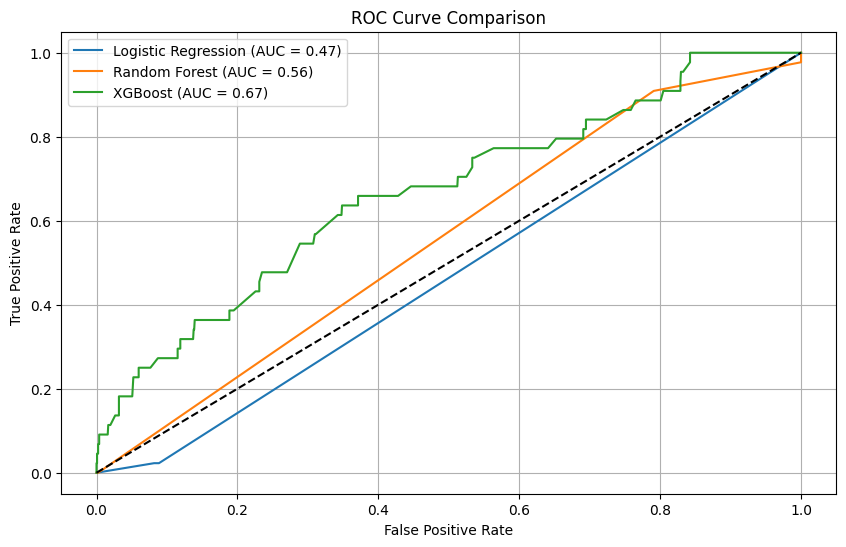

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
log_probs = log_reg.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import joblib
joblib.dump(xgb, 'final_xgb_model.pkl')


['final_xgb_model.pkl']

In [13]:
import pandas as pd
xgb_preds = xgb.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': xgb_preds
})
results.to_csv('xgb_predictions.csv', index=False)


Model Explainability with SHAP for better structure.

In [14]:
import shap
import xgboost as xgb  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


c:\Users\KIIT\anaconda3\envs\bankruptcy-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
import joblib
xgb_model = joblib.load('final_xgb_model.pkl') 


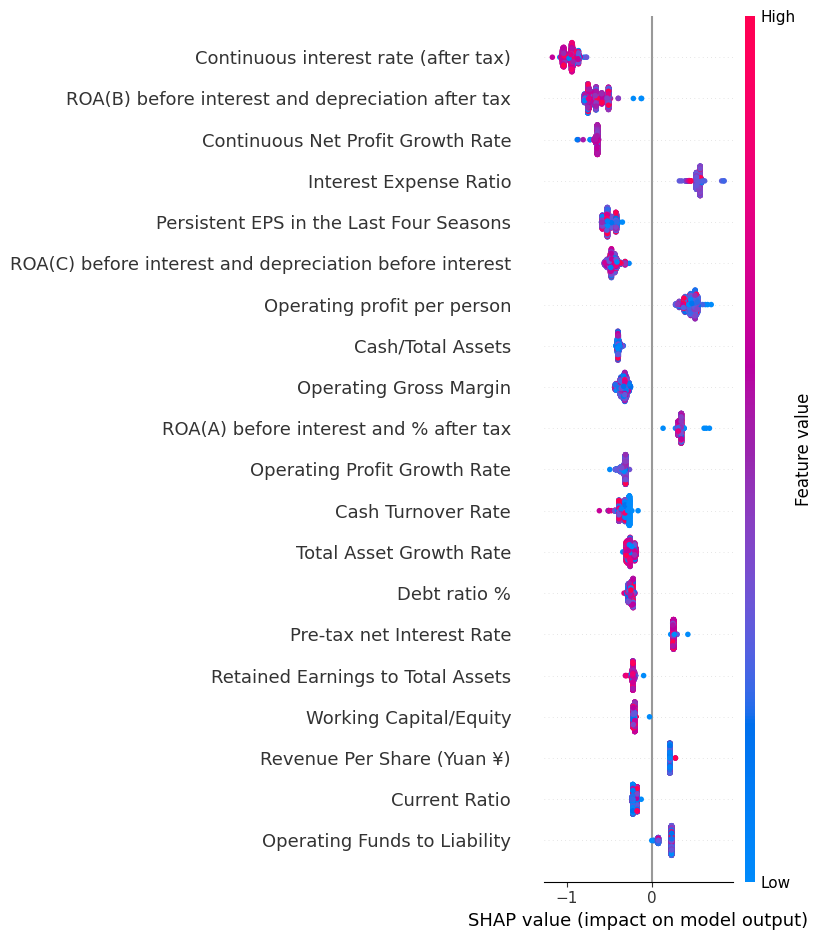

In [16]:
import shap
shap.initjs()
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

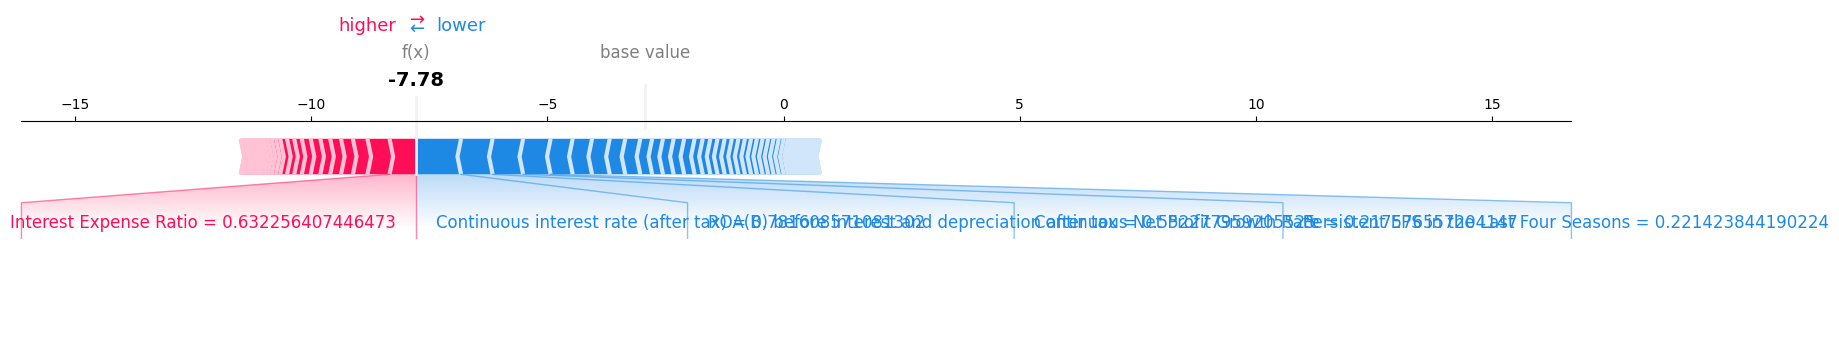

In [17]:
index = 0 
shap.plots.force(shap_values[index],matplotlib=True)

In [18]:
import pandas as pd 


In [19]:
import pandas as pd
import numpy as np

shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

shap_df["prediction"] = xgb_model.predict(X_test)
shap_df["actual"] = y_test.reset_index(drop=True)

shap_df.to_csv("shap_explanations.csv", index=False)
print("SHAP explanations saved to shap_explanations.csv")


SHAP explanations saved to shap_explanations.csv
